In [1]:
from scipy import optimize
import scipy.stats as st
import numpy as np
import pandas as pd
import math
import sys
import matplotlib.pyplot as plt
import scipy.io
from sklearn.linear_model import LinearRegression
import os.path
from os import path
import netCDF4
from statsmodels.tsa.stattools import acf
import netCDF4 as nc
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize
import scipy.stats as st
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
                    

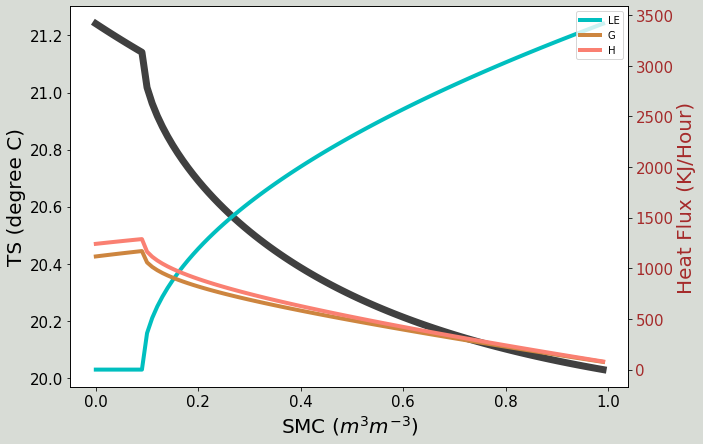

In [2]:
"""
=====================================================================================
Energy budget model for one meter cube soil to simulate corresponded soil temperature
=====================================================================================
The goal is to help to explore the SMC-TS breakpoint feature
Using energy budget: R-G=CpdT+H+LE , all in unit of Joule
Output gives the soil temperature, sensible and ground heat flux that reach energy balance.
This model assumes that 
(1) we perfectly know how LE reacts with SMC 
(2) have knowledge that soil heat capacity and conductviity increase with SMC.
(3) sensible heat is only sensitive to air-land temperature gradient
(4) Soil temperature perfectly represents for skin temperature
(5) Air temperature and deep layer soil temperature has not responsed to available energy yet

"""
# tunable parameters: default: 1, 1, 0,1, 0, 1, 1, 0, 0, 0
switch_watermass=1 # 1: water mass in considered;  0: not considered
switch_cs=1 # 1: SMC affects soil specific heat where cs = f(SMC); 0: not affect
base_cs=0 # alter the base of cs when no SMC 
switch_cg=1 # 1: SMC affects soil conductivity where cg = f(SMC); 0: not affect
base_cg=0 # alter the base of cg when no SMC  
base_ch=0 # alter the base of ch when no SMC  
switch_le=1 # 1: LE nonlinearly drops ; 0: LE linearly drops 
alb=1 # efficiency of using insolation - e.g. albedo..... 0<alb<1 
Tb=[0,0,0] # Purterbation of initial temperature for Soil T, Air T, and deep Soil T. All defauly set is T=20
poros=0.4 #Porosity
#States for modeling
oR=1000 #Available energy  (W/M^2)
R=oR/1000*3600*alb #Available energy  (KJ) for an hour for a meter square
m=1000 #mass of dry soil (kg) for a cube meter
SMC=np.arange(0,1,0.01) # Soil Moisture Content as the fraction occupying the pores (m3/m3)
T0=20+Tb[0] #Initial Soil Temperature (C)
TA=20+Tb[1] #Initial Air Temperature (C)
TG=20+Tb[2] #Initial Deep Soil Temperature (C)
TX=np.zeros(100)
H=np.zeros(100)
L=np.zeros(100)
G=np.zeros(100)

#Calculation
for i in range(0,100):
    Ch=(1+base_ch)*(m)
    Cs=(1+1*SMC[i]*switch_cs+base_cs)*(m+SMC[i]*poros*1000*switch_watermass) #Parameter of soil specific heat KJ/KG/K*KG
    Cg=(0.9+1*SMC[i]*switch_cg+base_cg)*(m+SMC[i]*poros*1000*switch_watermass) #
    
    if SMC[i]<0.1:
        LE=0    
    
    if SMC[i]>0.09 and (switch_le>0) :        
        LE=R*(SMC[i]-0.09)**0.5
        
    if (SMC[i]>0.09) and (switch_le<1) :        
        LE=R*(SMC[i]-0.09)
    
    TX[i]=(R-LE+Cs*T0+Cg*TG+Ch*TA)/(Cs+Cg+Ch) # R=H+LE+cpdT
    H[i]=Cs*(TX[i]-T0)
    L[i]=LE
    G[i]=Cg*(TX[i]-TG)

# Plotting


fig, ax1 = plt.subplots(figsize=(10,7))
fig.patch.set_facecolor('xkcd:light grey')
ax2 = ax1.twinx()
ax1.set_ylabel('TS (degree C)', color='black', fontsize=20)
ax1.set_xlabel('SMC ($m^{3}$$m^{-3}$)', color='black', fontsize=20)

ax1.plot(SMC,TX, color='black', linewidth=7.0, alpha=0.75)
ax1.tick_params(axis='y', labelcolor='black', labelsize=15)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('T'),loc="upper left")

ax2.set_ylabel('Heat Flux (KJ/Hour)', color='brown', fontsize=20)
ax2.plot(SMC,L, color='c',linewidth=4.0, alpha=1)
ax2.plot(SMC,G, color='peru',linewidth=4.0, alpha=1)
ax2.plot(SMC,H, color='salmon',linewidth=4.0, alpha=1)

ax2.tick_params(axis='y', labelcolor='brown', labelsize=15)
ax2.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('LE','G','H'),loc="upper right")


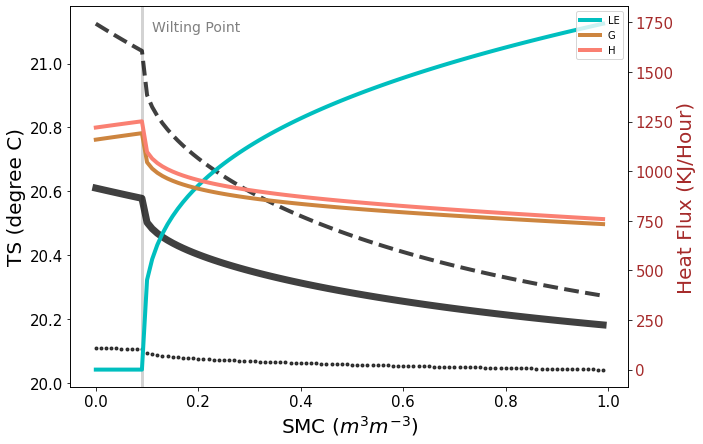

In [25]:
"""
=====================================================================================
Energy budget model for one meter cube soil to simulate corresponded soil temperature
=====================================================================================
The goal is to help to explore the SMC-TS breakpoint feature
Using energy budget: R-G=CpdT+H+LE
Output gives the soil temperature, sensible and ground heat flux that reach energy balance.
This model assumes that 
(1) we perfectly know how LE reacts with SMC 
(2) have knowledge that soil heat capacity and conductviity increase with SMC.
(3) sensible heat is only sensitive to air-land temperature gradient
(4) Soil temperature perfectly represent skin temperature
(5) Air temperature and deep layer soil temperature has not responsed to available energy yet
Using energy budget: R-G=CpdT+H+LE
"""
# tunable parameters: default: 1, 1, 0,1, 0, 1, 1, 0, 0, 0
switch_watermass=1 # 1: water mass in considered;  0: not considered
switch_cs=1 # 1: SMC affects soil specific heat where cs = f(SMC); 0: not affect
base_cs=1 # alter the base of cs when no SMC 
switch_cg=1 # 1: SMC affects soil conductivity where cg = f(SMC); 0: not affect
base_cg=1 # alter the base of cg when no SMC  
base_ch=1 # alter the base of ch when no SMC  
switch_le=1 # 1: LE nonlinearly drops ; 0: LE linearly drops 
alb=1 # efficiency of using insolation - e.g. albedo..... 0<alb<1 
Tb=[0,0,0] # Purterbation of initial temperature for Soil T, Air T, and deep Soil T. All defauly set is T=20
poros=0.4 #Porosity
#States for modeling
oR=1000 #Available energy  (W/M^2)
R=oR/1000*3600*alb #Available energy  (KJ) for an hour for a meter square
m=1000 #mass of dry soil (kg) for a cube meter
SMC=np.arange(0,1,0.01) # Soil Moisture Content as the fraction occupying the pores (m3/m3)
T0=20+Tb[0] #Initial Soil Temperature (C)
TA=20+Tb[1] #Initial Air Temperature (C)
TG=20+Tb[2] #Initial Deep Soil Temperature (C)
TX=np.zeros((3,100))
H=np.zeros((3,100))
L=np.zeros((3,100))
G=np.zeros((3,100))
weight=[1,0.1,10]
#Calculation
for case in range(0,3):
    www=weight[case]
    for i in range(0,100):
        Ch=(1+base_ch*www)*(m)
        Cs=(1+1*SMC[i]*switch_cs+base_cs*www)*(m+SMC[i]*poros*1000*switch_watermass) #Parameter of soil specific heat KJ/KG/K*KG
        Cg=(0.9+1*SMC[i]*switch_cg+base_cg*www)*(m+SMC[i]*poros*1000*switch_watermass) #

        if SMC[i]<0.1:
            LE=0    

        if SMC[i]>0.09 and (switch_le>0) :        
            LE=R*(SMC[i]-0.09)**0.3/2

        if (SMC[i]>0.09) and (switch_le<1) :        
            LE=R*(SMC[i]-0.09)/2

        TX[case,i]=(R-LE+Cs*T0+Cg*TG+Ch*TA)/(Cs+Cg+Ch) # R=H+LE+cpdT
        H[case,i]=Cs*(TX[case,i]-T0)
        L[case,i]=LE
        G[case,i]=Cg*(TX[case,i]-TG)

# Plotting


fig, ax1 = plt.subplots(figsize=(10,7))
fig.patch.set_facecolor('xkcd:white')
ax2 = ax1.twinx()
ax1.set_ylabel('TS (degree C)', color='black', fontsize=20)
ax1.set_xlabel('SMC ($m^{3}$$m^{-3}$)', color='black', fontsize=20)
ax1.axvline(x = 0.09, color='lightgray', label = 'axvline - full height' , linewidth=3.0)
ax1.text(0.11, 21.1, 'Wilting Point', color='grey', fontsize = 14)

ax1.plot(SMC,TX[0,:], color='black', linewidth=7.0, alpha=0.75)
ax1.plot(SMC,TX[1,:], 'k--', linewidth=4.0, alpha=0.75)
ax1.plot(SMC,TX[2,:], 'k.', linewidth=4.0, alpha=0.75)

ax1.tick_params(axis='y', labelcolor='black', labelsize=15)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('T'),loc="upper left")

ax2.set_ylabel('Heat Flux (KJ/Hour)', color='brown', fontsize=20)
ax2.plot(SMC,L[0,:], color='c',linewidth=4.0, alpha=1)
ax2.plot(SMC,G[0,:], color='peru',linewidth=4.0, alpha=1)
ax2.plot(SMC,H[0,:], color='salmon',linewidth=4.0, alpha=1)

ax2.tick_params(axis='y', labelcolor='brown', labelsize=15)
ax2.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('LE','G','H'),loc="upper right")
plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure4a_Model_realisticLE', format="pdf", bbox_inches="tight")

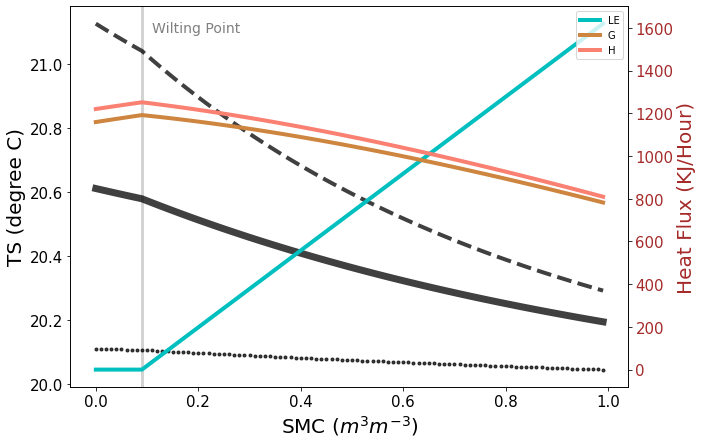

In [24]:
"""
=====================================================================================
Energy budget model for one meter cube soil to simulate corresponded soil temperature
=====================================================================================
The goal is to help to explore the SMC-TS breakpoint feature
Using energy budget: R-G=CpdT+H+LE
Output gives the soil temperature, sensible and ground heat flux that reach energy balance.
This model assumes that 
(1) we perfectly know how LE reacts with SMC 
(2) have knowledge that soil heat capacity and conductviity increase with SMC.
(3) sensible heat is only sensitive to air-land temperature gradient
(4) Soil temperature perfectly represent skin temperature
(5) Air temperature and deep layer soil temperature has not responsed to available energy yet
Using energy budget: R-G=CpdT+H+LE
"""
# tunable parameters: default: 1, 1, 0,1, 0, 1, 1, 0, 0, 0
switch_watermass=1 # 1: water mass in considered;  0: not considered
switch_cs=1 # 1: SMC affects soil specific heat where cs = f(SMC); 0: not affect
base_cs=1 # alter the base of cs when no SMC 
switch_cg=1 # 1: SMC affects soil conductivity where cg = f(SMC); 0: not affect
base_cg=1 # alter the base of cg when no SMC  
base_ch=1 # alter the base of ch when no SMC  
switch_le=0 # 1: LE nonlinearly drops ; 0: LE linearly drops 
alb=1 # efficiency of using insolation - e.g. albedo..... 0<alb<1 
Tb=[0,0,0] # Purterbation of initial temperature for Soil T, Air T, and deep Soil T. All defauly set is T=20
poros=0.4 #Porosity
#States for modeling
oR=1000 #Available energy  (W/M^2)
R=oR/1000*3600*alb #Available energy  (KJ) for an hour for a meter square
m=1000 #mass of dry soil (kg) for a cube meter
SMC=np.arange(0,1,0.01) # Soil Moisture Content as the fraction occupying the pores (m3/m3)
T0=20+Tb[0] #Initial Soil Temperature (C)
TA=20+Tb[1] #Initial Air Temperature (C)
TG=20+Tb[2] #Initial Deep Soil Temperature (C)
TX=np.zeros((3,100))
H=np.zeros((3,100))
L=np.zeros((3,100))
G=np.zeros((3,100))
weight=[1,0.1,10]
#Calculation
for case in range(0,3):
    www=weight[case]
    for i in range(0,100):
        Ch=(1+base_ch*www)*(m)
        Cs=(1+1*SMC[i]*switch_cs+base_cs*www)*(m+SMC[i]*poros*1000*switch_watermass) #Parameter of soil specific heat KJ/KG/K*KG
        Cg=(0.9+1*SMC[i]*switch_cg+base_cg*www)*(m+SMC[i]*poros*1000*switch_watermass) #

        if SMC[i]<0.1:
            LE=0    

        if SMC[i]>0.09 and (switch_le>0) :        
            LE=R*(SMC[i]-0.09)**0.3/2

        if (SMC[i]>0.09) and (switch_le<1) :        
            LE=R*(SMC[i]-0.09)/2

        TX[case,i]=(R-LE+Cs*T0+Cg*TG+Ch*TA)/(Cs+Cg+Ch) # R=H+LE+cpdT
        H[case,i]=Cs*(TX[case,i]-T0)
        L[case,i]=LE
        G[case,i]=Cg*(TX[case,i]-TG)

# Plotting


fig, ax1 = plt.subplots(figsize=(10,7))
fig.patch.set_facecolor('xkcd:white')
ax2 = ax1.twinx()
ax1.set_ylabel('TS (degree C)', color='black', fontsize=20)
ax1.set_xlabel('SMC ($m^{3}$$m^{-3}$)', color='black', fontsize=20)
ax1.axvline(x = 0.09, color='lightgray', label = 'axvline - full height' , linewidth=3.0)
ax1.text(0.11, 21.1, 'Wilting Point', color='grey', fontsize = 14)
ax1.plot(SMC,TX[0,:], color='black', linewidth=7.0, alpha=0.75)
ax1.plot(SMC,TX[1,:], 'k--', linewidth=4.0, alpha=0.75)
ax1.plot(SMC,TX[2,:], 'k.', linewidth=4.0, alpha=0.75)


ax1.tick_params(axis='y', labelcolor='black', labelsize=15)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('T'),loc="upper left")

ax2.set_ylabel('Heat Flux (KJ/Hour)', color='brown', fontsize=20)
ax2.plot(SMC,L[0,:], color='c',linewidth=4.0, alpha=1)
ax2.plot(SMC,G[0,:], color='peru',linewidth=4.0, alpha=1)
ax2.plot(SMC,H[0,:], color='salmon',linewidth=4.0, alpha=1)

ax2.tick_params(axis='y', labelcolor='brown', labelsize=15)
ax2.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('LE','G','H'),loc="upper right")
plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure4b_Model_simpleLE', format="pdf", bbox_inches="tight")

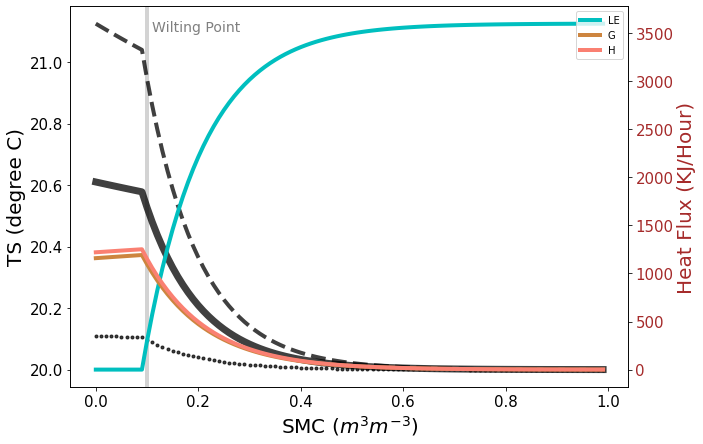

In [17]:
"""
=====================================================================================
Energy budget model for one meter cube soil to simulate corresponded soil temperature
=====================================================================================
The goal is to help to explore the SMC-TS breakpoint feature
Using energy budget: R-G=CpdT+H+LE
Output gives the soil temperature, sensible and ground heat flux that reach energy balance.
This model assumes that 
(1) we perfectly know how LE reacts with SMC 
(2) have knowledge that soil heat capacity and conductviity increase with SMC.
(3) sensible heat is only sensitive to air-land temperature gradient
(4) Soil temperature perfectly represent skin temperature
(5) Air temperature and deep layer soil temperature has not responsed to available energy yet
Using energy budget: R-G=CpdT+H+LE
"""
# tunable parameters: default: 1, 1, 0,1, 0, 1, 1, 0, 0, 0
switch_watermass=1 # 1: water mass in considered;  0: not considered
switch_cs=1 # 1: SMC affects soil specific heat where cs = f(SMC); 0: not affect
base_cs=1 # alter the base of cs when no SMC 
switch_cg=1 # 1: SMC affects soil conductivity where cg = f(SMC); 0: not affect
base_cg=1 # alter the base of cg when no SMC  
base_ch=1 # alter the base of ch when no SMC  
switch_le=1 # 1: LE nonlinearly drops ; 0: LE linearly drops 
alb=1 # efficiency of using insolation - e.g. albedo..... 0<alb<1 
Tb=[0,0,0] # Purterbation of initial temperature for Soil T, Air T, and deep Soil T. All defauly set is T=20
poros=0.4 #Porosity
#States for modeling
oR=1000 #Available energy  (W/M^2)
R=oR/1000*3600*alb #Available energy  (KJ) for an hour for a meter square
m=1000 #mass of dry soil (kg) for a cube meter
SMC=np.arange(0,1,0.01) # Soil Moisture Content as the fraction occupying the pores (m3/m3)
T0=20+Tb[0] #Initial Soil Temperature (C)
TA=20+Tb[1] #Initial Air Temperature (C)
TG=20+Tb[2] #Initial Deep Soil Temperature (C)
TX=np.zeros((3,100))
H=np.zeros((3,100))
L=np.zeros((3,100))
G=np.zeros((3,100))
weight=[1,0.1,10]
#Calculation
for case in range(0,3):
    www=weight[case]
    for i in range(0,100):
        Ch=(1+base_ch*www)*(m)
        Cs=(1+1*SMC[i]*switch_cs+base_cs*www)*(m+SMC[i]*poros*1000*switch_watermass) #Parameter of soil specific heat KJ/KG/K*KG
        Cg=(0.9+1*SMC[i]*switch_cg+base_cg*www)*(m+SMC[i]*poros*1000*switch_watermass) #

        if SMC[i]<0.1:
            LE=0    

        if SMC[i]>0.09 and (switch_le>0) :        
            LE=R*(1-2**-((SMC[i]-0.09)/0.08))
#
        if (SMC[i]>0.09) and (switch_le<1) :        
            LE=R*(SMC[i]-0.09)/2

        TX[case,i]=(R-LE+Cs*T0+Cg*TG+Ch*TA)/(Cs+Cg+Ch) # R=H+LE+cpdT
        H[case,i]=Cs*(TX[case,i]-T0)
        L[case,i]=LE
        G[case,i]=Cg*(TX[case,i]-TG)

# Plotting


fig, ax1 = plt.subplots(figsize=(10,7))
fig.patch.set_facecolor('xkcd:white')
ax2 = ax1.twinx()
ax1.set_ylabel('TS (degree C)', color='black', fontsize=20)
ax1.set_xlabel('SMC ($m^{3}$$m^{-3}$)', color='black', fontsize=20)
ax1.axvline(x = 0.1, color='lightgray', label = 'axvline - full height' , linewidth=4.0)
ax1.text(0.11, 21.1, 'Wilting Point', color='grey', fontsize = 14)

ax1.plot(SMC,TX[0,:], color='black', linewidth=7.0, alpha=0.75)
ax1.plot(SMC,TX[1,:], 'k--', linewidth=4.0, alpha=0.75)
ax1.plot(SMC,TX[2,:], 'k.', linewidth=4.0, alpha=0.75)

ax1.tick_params(axis='y', labelcolor='black', labelsize=15)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('T'),loc="upper left")

ax2.set_ylabel('Heat Flux (KJ/Hour)', color='brown', fontsize=20)
ax2.plot(SMC,L[0,:], color='c',linewidth=4.0, alpha=1)
ax2.plot(SMC,G[0,:], color='peru',linewidth=4.0, alpha=1)
ax2.plot(SMC,H[0,:], color='salmon',linewidth=4.0, alpha=1)

ax2.tick_params(axis='y', labelcolor='brown', labelsize=15)
ax2.tick_params(axis='x', labelcolor='black', labelsize=15)
plt.gca().legend(('LE','G','H'),loc="upper right")
#plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure4a_Model_realisticLE', format="pdf", bbox_inches="tight")